# Access Usage Log as Data Producer

## Dependencies

In [1]:
import geoengine as ge
import matplotlib.pyplot as plt

## Connect to the Virtual Data Trustee

In [2]:
ge.initialize("http://localhost:3030/api", ("admin@localhost", "adminadmin")) # TODO: load from .env for demo TODO: set remote url

## Access Usage Log

In [3]:
usage = ge.data_usage(0, 10)
usage

,computationId,count,data,timestamp,userId
0,ca82e727-b1a5-4f0a-963d-e4379da4bcf3,6,GdalSource,2024-11-28 15:48:23.003000+00:00,d5d3b34c-360c-4ed0-aedc-69c289222e7f
1,ca82e727-b1a5-4f0a-963d-e4379da4bcf3,1,OgrSource,2024-11-28 15:48:13.003000+00:00,d5d3b34c-360c-4ed0-aedc-69c289222e7f
2,0017ed59-a369-4869-8945-0eecf5f09bf5,1,OgrSource,2024-11-28 15:39:12.932000+00:00,d5d3b34c-360c-4ed0-aedc-69c289222e7f
3,21799f3d-2a70-474b-8c09-079292113867,2,GdalSource,2024-11-28 15:39:12.932000+00:00,d5d3b34c-360c-4ed0-aedc-69c289222e7f
4,35208ed7-f6f2-4f26-a85f-c3b1f8b6d9d9,2,GdalSource,2024-11-28 15:39:12.932000+00:00,d5d3b34c-360c-4ed0-aedc-69c289222e7f
5,3d2e3da4-f678-4b6f-bbe3-329ba7ab3870,4,GdalSource,2024-11-28 15:39:12.932000+00:00,d5d3b34c-360c-4ed0-aedc-69c289222e7f
6,47661177-49e7-4fc7-95af-6112b3707b3e,4,GdalSource,2024-11-28 15:39:12.932000+00:00,d5d3b34c-360c-4ed0-aedc-69c289222e7f
7,5e58efe5-6d56-4369-b396-a5d36b632717,2,GdalSource,2024-11-28 15:39:12.932000+00:00,d5d3b34c-360c-4ed0-aedc-69c289222e7f
8,6a0d85c8-ab99-4fef-b9ef-cefcaa5e0f9c,2,GdalSource,2024-11-28 15:39:12.932000+00:00,d5d3b34c-360c-4ed0-aedc-69c289222e7f
9,6a5239be-f9a8-44fc-a9da-02d7ab1c02bc,2,GdalSource,2024-11-28 15:39:12.932000+00:00,d5d3b34c-360c-4ed0-aedc-69c289222e7f


## Access Usage Summary

In [4]:
usage_summary = ge.data_usage_summary(ge.UsageSummaryGranularity.MINUTES)
usage_summary


,count,dataset,timestamp
0,6,GdalSource,2024-11-28 15:48:00+00:00
1,1,OgrSource,2024-11-28 15:48:00+00:00
2,30,GdalSource,2024-11-28 15:39:00+00:00
3,1,OgrSource,2024-11-28 15:39:00+00:00


## Plot usage summary

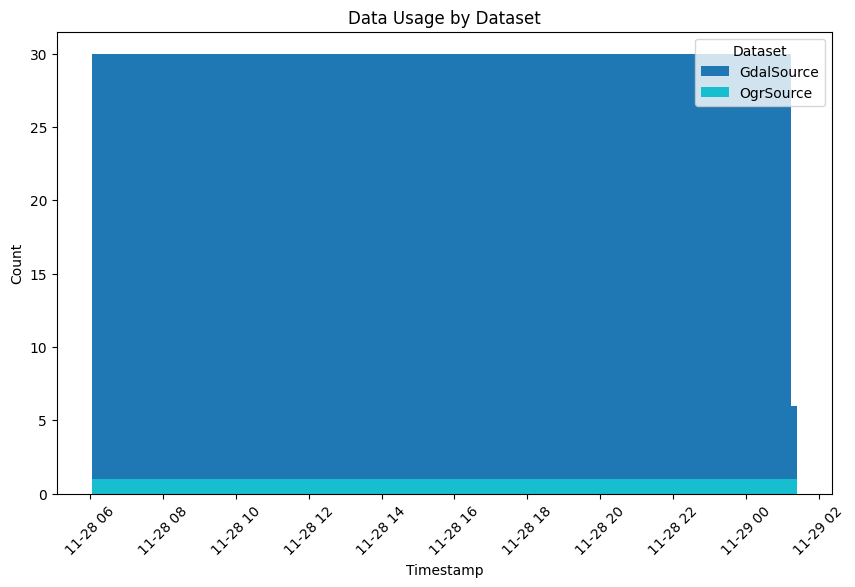

In [5]:
ge.plot_data_usage_summary(ge.UsageSummaryGranularity.MINUTES)

In [ ]:
import pandas as pd


pivot_df = usage_summary.pivot(index='timestamp', columns='dataset', values='count').fillna(0)
pivot_df['timestamp'] = pd.to_datetime(pivot_df['timestamp']).dt.tz_localize(None)

pivot_df

pivot_df.plot(kind='bar', figsize=(10, 6))

plt.title('Data Usage by Dataset over time')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'to_datetime'